In [173]:
# import statements
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function Definitions

In [164]:
# define model
def SEI_model(y, t, k, delta, lamb):
    S, E, I = y
    dSdt = -S*I*lamb(t)
    dEdt = S*I*lamb(t) - E*k(t)
    dIdt = E*k(t) - I*delta(t)
    return dSdt, dEdt, dIdt

#  plot model
def plotSEI(t, S, E, I):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'r', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'c', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')

    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show();

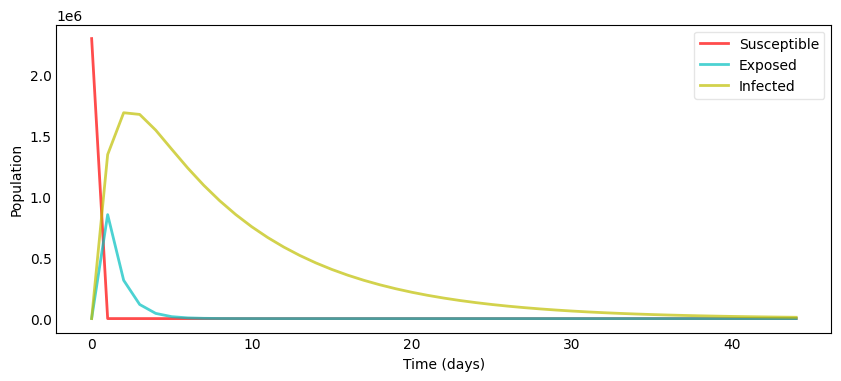

In [165]:
# set parameter values

# def gamma(t): return np.piecewise(t, [t>=0], [0.08]) ## given in paper
# def k(t): return np.piecewise(t, [t>=0], [1/3])
# def delta(t): return np.piecewise(t, [t>=0], [1/8])
# def alpha(t): return np.piecewise(t, [t>=0], [51]) ## min: 51, max: 796
# def beta(t): return np.piecewise(t, [t>=0], [4.49e7])
# def lamb(t): return np.piecewise(t, [t>=0], [9.66e-7])

def gamma(t): return np.piecewise(t, [t>=0], [0.999]) ## given in paper
def k(t): return np.piecewise(t, [t>=0], [1/3])
def delta(t): return np.piecewise(t, [t>=0], [1/8])
def alpha(t): return np.piecewise(t, [t>=0], [500]) ## min: 51, max: 796
def beta(t): return np.piecewise(t, [t>=0], [4.499915e7])
def lamb(t): return np.piecewise(t, [t>=0], [0.47])


# set initial conditions
### Values from MIRA's AMR
I0 = 0
E0 = 1000
V0 = 0
S0 = 2300000.00000000
y0 = S0, E0, I0 # Initial conditions vector
N = S0 + E0 + I0 

# set simulation parameters
dt = 1
tstart = 0
tend = 45
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEI_model, y0, tvect, args=(gamma, delta, lamb))
S, E, I = sim.T

# plot results
plotSEI(tvect, S, E, I)

In [166]:
# define model
def SEIV_model(y, t, gamma, k, delta, alpha, beta, lamb, N):
    S, E, I, V = y
    dSdt = -S*I*lamb(t)
    dEdt = S*I*lamb(t) - E*k(t)
    dIdt = E*k(t) - I*delta(t)
    dVdt = I*alpha(t)*beta(t)*(1-gamma(t))
    return dSdt, dEdt, dIdt, dVdt

#  plot model
def plotSEIV(t, S, E, I, V):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'r', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'c', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    # ax.plot(t, V, 'g', alpha=0.7, linewidth=2, label='Viral load')

    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show();

# Example Simulation and Plot

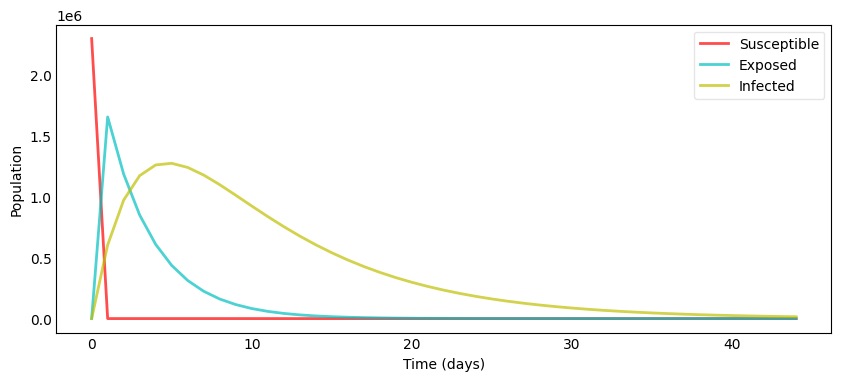

In [167]:
# set parameter values
# #def gamma(t): return np.piecewise(t, [t>=0], [1e-6]) ## placeholder; synthesize
# def gamma(t): return np.piecewise(t, [t>=0], [0.08]) ## given in paper
# def k(t): return np.piecewise(t, [t>=0], [1/3])
# def delta(t): return np.piecewise(t, [t>=0], [1/8])
# def alpha(t): return np.piecewise(t, [t>=0], [50]) ## min: 51, max: 796
# def beta(t): return np.piecewise(t, [t>=0], [4.49e7])
# def lamb(t): return np.piecewise(t, [t>=0], [9.66e-7])


# def gamma(t): return np.piecewise(t, [t>=0], [0.08]) ## given in paper
# def k(t): return np.piecewise(t, [t>=0], [1/3])
# def delta(t): return np.piecewise(t, [t>=0], [1/8])
# def alpha(t): return np.piecewise(t, [t>=0], [51]) ## min: 51, max: 796
# def beta(t): return np.piecewise(t, [t>=0], [4.49e7])
# def lamb(t): return np.piecewise(t, [t>=0], [9.66e-8])

### Values from parameter synthesis
def gamma(t): return np.piecewise(t, [t>=0], [0.999]) ## given in paper
def k(t): return np.piecewise(t, [t>=0], [1/3])
def delta(t): return np.piecewise(t, [t>=0], [1/8])
def alpha(t): return np.piecewise(t, [t>=0], [500]) ## min: 51, max: 796
def beta(t): return np.piecewise(t, [t>=0], [4.499915e7])
def lamb(t): return np.piecewise(t, [t>=0], [0.47])

# set initial conditions
### Values from MIRA's AMR
I0 = 0
E0 = 1000
V0 = 0
S0 = 2300000.00000000
y0 = S0, E0, I0, V0 # Initial conditions vector
N = S0 + E0 + I0 + V0

# set simulation parameters
dt = 1
tstart = 0
tend = 45
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIV_model, y0, tvect, args=(gamma, k, delta, alpha, beta, lamb, N))
S, E, I, V = sim.T

# plot results
plotSEIV(tvect, S, E, I, V)

In [168]:
df = pd.DataFrame(list(zip(S, E, I, V)), columns =['S', 'E', 'I', 'V'])
df.head()

,S,E,I,V
0,2.300000e+06,1.000000e+03,0.000000e+00,0.000000e+00
1,-2.921490e-12,1.656101e+06,6.046718e+05,7.240749e+12
2,-2.737625e-10,1.186648e+06,9.733903e+05,2.537259e+13
3,-1.264307e-08,8.502706e+05,1.174122e+06,4.978833e+13
4,2.751158e-16,6.092455e+05,1.261944e+06,7.736435e+13


In [169]:
from decimal import Decimal

'%.2E' % Decimal(f'{max(V)}')

'4.11E+14'

### 3.2: SIEVC model

In [37]:
# define model
def SEIVC_model(y, t, gamma, k, delta, alpha, beta, lamb):
    S, E, I, V, C = y
    dSdt = -S*I*lamb(t)
    dEdt = S*I*lamb(t) - E*k(t)
    dIdt = E*k(t) - I*delta(t)
    dVdt = I*alpha(t)*beta(t)*(1-gamma(t))
    dCdt = S*I*lamb(t) ## cumulative cases
    return dSdt, dEdt, dIdt, dVdt, dCdt

#  plot model
def plotSEIVC(t, S, E, I, V, C):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'r', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'c', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    #ax.plot(t, V, 'g', alpha=0.7, linewidth=2, label='Viral load')
    ax.plot(t, C, 'b', alpha=0.7, linewidth=2, label='Cumulative cases')


    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show();

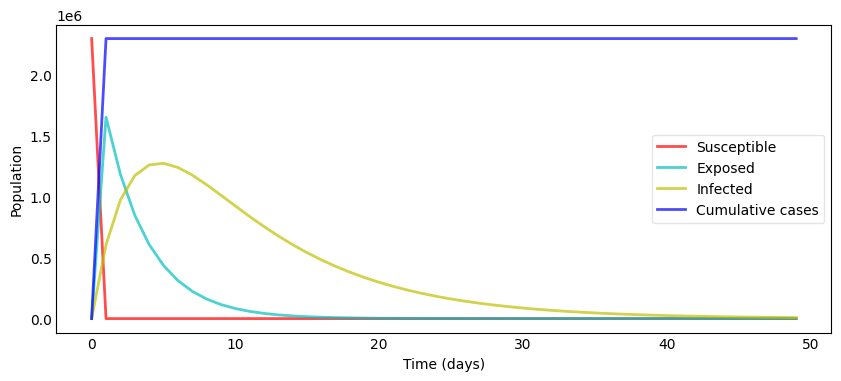

In [170]:
# set parameter values
# def gamma(t): return np.piecewise(t, [t>=0], [1/100000]) ## placeholder; synthesize
# def k(t): return np.piecewise(t, [t>=0], [1/3])
# def delta(t): return np.piecewise(t, [t>=0], [1/8])
# def alpha(t): return np.piecewise(t, [t>=0], [500]) ## min: 51, max: 796
# def beta(t): return np.piecewise(t, [t>=0], [4.49])
### Values from parameter synthesis
def gamma(t): return np.piecewise(t, [t>=0], [0.999]) ## given in paper
def k(t): return np.piecewise(t, [t>=0], [1/3])
def delta(t): return np.piecewise(t, [t>=0], [1/8])
def alpha(t): return np.piecewise(t, [t>=0], [500]) ## min: 51, max: 796
def beta(t): return np.piecewise(t, [t>=0], [4.499915e7])
def lamb(t): return np.piecewise(t, [t>=0], [0.47])

# set initial conditions
I0 = 0 
E0 = 1000
V0 = 0
S0 = 2300000.00000000
C0 = I0
y0 = S0, E0, I0, V0, C0 # Initial conditions vector

# set simulation parameters
## 
dt = 1
tstart = 0
tend = 50
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIVC_model, y0, tvect, args=(gamma, k, delta, alpha, beta))
S, E, I, V, C = sim.T

# plot results
plotSEIVC(tvect, S, E, I, V, C)

### 3.3: SIEVCDU model

In [171]:
# define model
def SEIVCDU_model(y, t, gamma, k, delta, alpha, beta, kappa, lamb):
    S, E, I, V, C, D, U = y
    dSdt = -S*I*lamb(t)
    dEdt = S*I*lamb(t) - E*k(t)
    dIdt = E*k(t) - I*delta(t)
    dVdt = I*alpha(t)*beta(t)*(1-gamma(t))
    dCdt = S*I*lamb(t) ## cumulative cases
    dDdt = I*S*kappa(t)*lamb(t)
    dUdt = I*S*lamb(t)*(1-kappa(t))
    return dSdt, dEdt, dIdt, dVdt, dCdt, dDdt, dUdt

#  plot model
def plotSEIVCDU(t, S, E, I, V, C, D, U):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'r', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'orange', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    #ax.plot(t, V, 'g', alpha=0.7, linewidth=2, label='Viral load')
    ax.plot(t, C, 'g', alpha=0.7, linewidth=2, label='Cumulative cases')
    ax.plot(t, D, 'b', alpha=0.7, linewidth=2, linestyle='--', label='Diagnosed cases')
    ax.plot(t, U, 'p', alpha=0.7, linewidth=2, label='Undiagnosed(?) cases')

    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show();

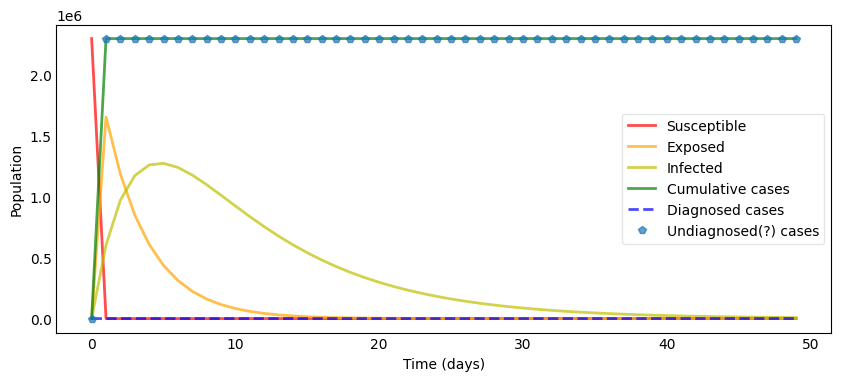

In [172]:
# # set parameter values
# def gamma(t): return np.piecewise(t, [t>=0], [1e-5]) ## placeholder; synthesize
# def k(t): return np.piecewise(t, [t>=0], [1/3])
# def delta(t): return np.piecewise(t, [t>=0], [1/8])
# def alpha(t): return np.piecewise(t, [t>=0], [500]) ## min: 51, max: 796
# def beta(t): return np.piecewise(t, [t>=0], [4.49])
# def kappa(t): return np.piecewise(t, [t>=0], [1e-4]) ## placeholder; synthesize
# def lamb(t): return np.piecewise(t, [t>=0], [1e-4]) ## placeholder; synthesize
### Values from parameter synthesis
def gamma(t): return np.piecewise(t, [t>=0], [0.999]) ## given in paper
def k(t): return np.piecewise(t, [t>=0], [1/3])
def delta(t): return np.piecewise(t, [t>=0], [1/8])
def alpha(t): return np.piecewise(t, [t>=0], [500]) ## min: 51, max: 796
def beta(t): return np.piecewise(t, [t>=0], [4.499915e7])
def lamb(t): return np.piecewise(t, [t>=0], [0.47])
def kappa(t): return np.piecewise(t, [t>=0], [1e-4]) ## placeholder; synthesize


# set initial conditions
I0 = 0 
E0 = 1000
V0 = 0
S0 = 2300000.00000000
C0 = I0
D0 = 0
U0 = 0
y0 = S0, E0, I0, V0, C0, D0, U0 # Initial conditions vector

# set simulation parameters
## 
dt = 1
tstart = 0
tend = 50
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIVCDU_model, y0, tvect, args=(gamma, k, delta, alpha, beta, kappa, lamb))
S, E, I, V, C, D, U = sim.T

# plot results
plotSEIVCDU(tvect, S, E, I, V, C, D, U)